In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from sklearn.model_selection import train_test_split


classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [7]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
     try:
         for gpu in gpus:
             tf.config.experimental.set_memory_growth(gpu, True)
     except RuntimeError as e:
         print(e)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized


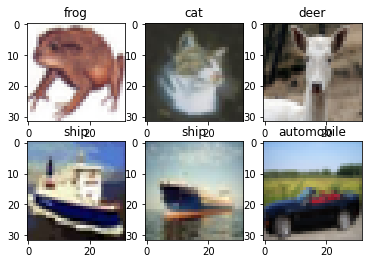

(40000, 32, 32, 3)
(40000,)
(10000, 32, 32, 3)
(10000,)
(10000, 32, 32, 3)
(10000,)


In [8]:
cifar= tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
train_images,val_images,train_labels,val_labels = train_test_split(train_images, train_labels, test_size = 0.2)


train_labels = train_labels.reshape(-1,)
val_labels = val_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)


for i in range(6):
  plt.subplot(2,3,i+1)
  plt.title(classes[train_labels[i]])
  plt.imshow(train_images[i],cmap='gray')
plt.show()

print(train_images.shape)
print(train_labels.shape)

print(val_images.shape)
print(val_labels.shape)

print(test_images.shape)
print(test_labels.shape)



 
 

---


  ### Pretrained Model







In [ ]:

model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.UpSampling2D(size=(7, 7),interpolation='bilinear'))

model.add(tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(32,32,3),
    pooling='avg',
    classes=10
    ))
for layer in model.layers:
        layer.trainable=False 

model.add(tf.keras.layers.Dropout(.25))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model.summary()


In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=10
batchSize=64

model.compile(loss=loss,optimizer=optim,metrics=metrics)
result=model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,validation_data = (val_images, val_labels))



In [ ]:
loss, accuracy = model.evaluate(test_images,test_labels,batch_size=batchSize)
print('Accuracy : ', accuracy)

157/157 [==============================] - 15s 87ms/step - loss: 0.5178 - accuracy: 0.8193
Accuracy :  0.8192999958992004


### Predicting 

In [ ]:
# cnt =random.randint(100)
# # cnt =4

# import cv2
# image=cv2.imread(str(test_images[cnt]))
# image_resized= cv2.resize(image, (224,224))
# image=np.expand_dims(image_resized,axis=0)

# pred= model.predict(test_images[cnt])
# label= np.argmax(pred)

# # print pred + Image
# plt.imshow(test_images[cnt],cmap='gray')
# print(label)
# print("Prediction Class Label : ",test_labels[label])
# print("Prediction Class Name  : ",classes[test_labels[label]])
# print("Actual Class Name  : ",classes[test_labels[cnt]])


#### Graphs

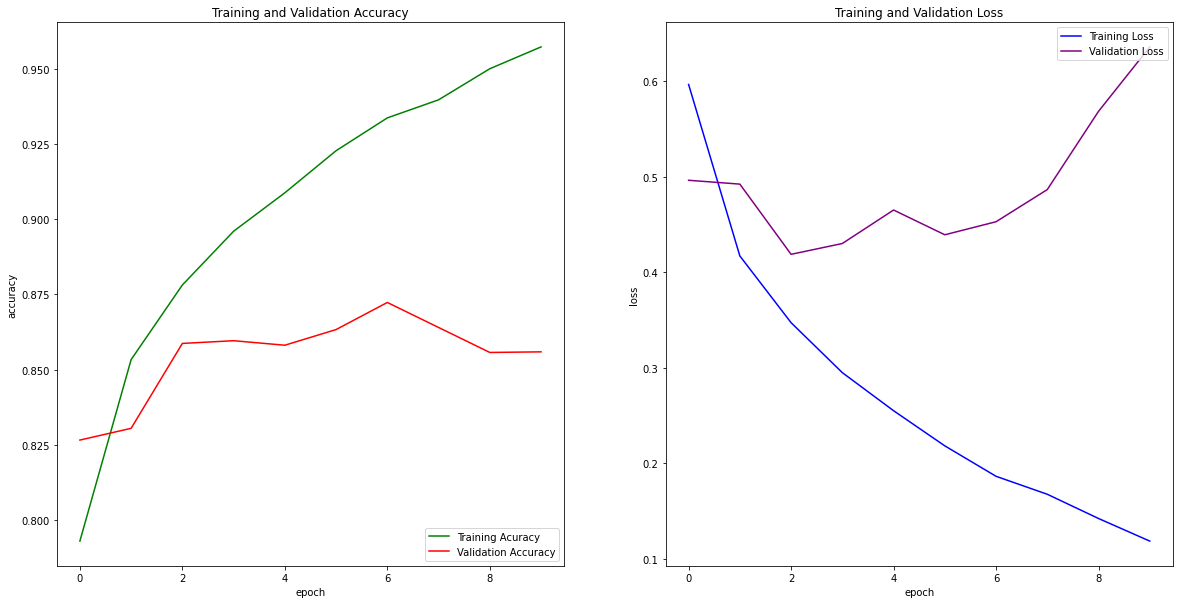

In [ ]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Training and Validation Accuracy")
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.title('Training and Validation Loss')
plt.plot(loss,color = 'blue',label = 'Training Loss')
plt.plot(val_loss,color = 'purple',label = 'Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()


#### Confusion Matrix / Heat Map

313/313 [==============================] - 15s 45ms/step


<AxesSubplot:>

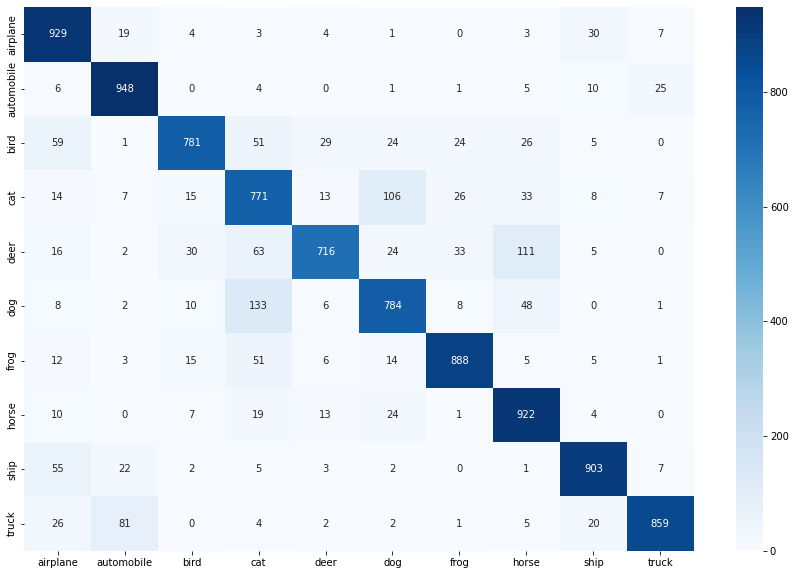

In [ ]:
y_pred = np.argmax(model.predict(test_images), axis=1)
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=labels, index=labels)
plt.figure(figsize=(15,10))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")